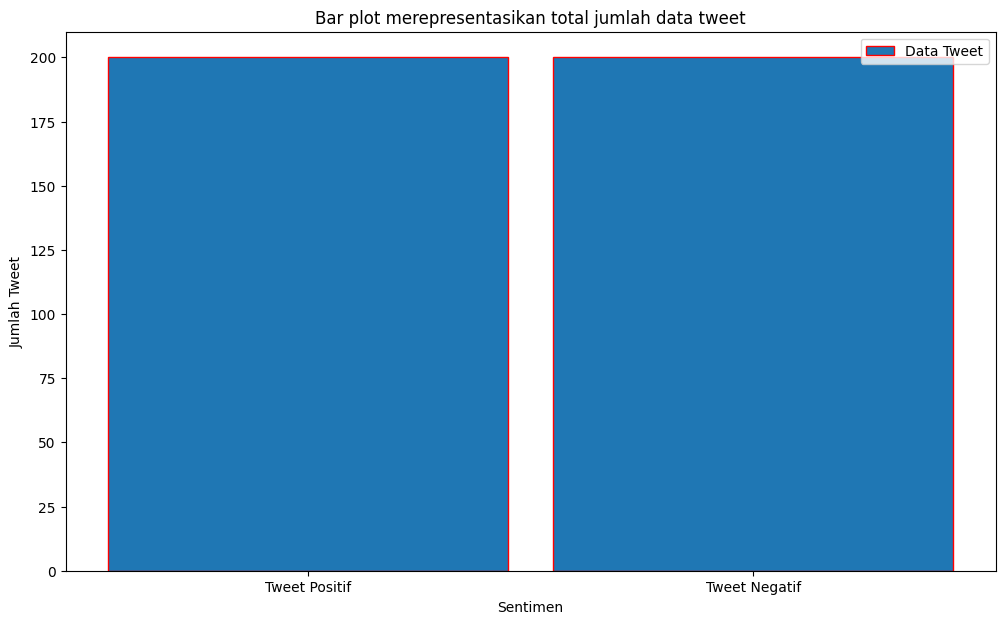

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# PREPROCESSING DATA
# Load data
df = pd.read_csv('text_preprocessing/final_dataset.csv')

# Visualisasi data
tweet_bar_df = df['Sentiment'].value_counts()

plt.figure(figsize=(12, 7))
sentimen = ['Tweet Positif', 'Tweet Negatif']
plt.bar(sentimen, tweet_bar_df.values, align='center', edgecolor='red', width=0.9)
for i in range(len(sentimen)):
    plt.annotate(tweet_bar_df.values[i], (-0.1 + i, tweet_bar_df.values[i] + 30))
plt.legend(labels=['Data Tweet'])
plt.title("Bar plot merepresentasikan total jumlah data tweet")
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
plt.show()

# Konversi sentimen positif = 1, negatif = 0
def convert_label_sentimen(label_sentimen):
    return 1 if label_sentimen == "positive" else 0

df['label_sentimen'] = df['Sentiment'].apply(convert_label_sentimen)
df.drop(df.columns[[0]], axis=1, inplace=True)

In [37]:
# K-fold cross validation (splitting data)
X = df['tweet_tokens_stemmed']
y = df['label_sentimen']
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Array untuk menyimpan skor validasi silang
cv_accuracy_mnb, cv_precision_mnb, cv_recall_mnb = [], [], []
cv_accuracy_bnb, cv_precision_bnb, cv_recall_bnb = [], [], []
cv_accuracy_gnb, cv_precision_gnb, cv_recall_gnb = [], [], []

for train_idx, val_idx in kfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]

    # Vektorisasi text menggunakan TF-IDF
    tfidf_model = TfidfVectorizer(smooth_idf=False).fit(X_train)
    X_train = tfidf_model.transform(X_train)
    X_test = tfidf_model.transform(X_test)

    # Reset indeks untuk y_train
    y_train.reset_index(drop=True, inplace=True)


MULTINOMIAL NAIVE BAYES

Multinomial Naive Bayes
Cross-validation results (Accuracy): [77.77777778 83.33333333 72.22222222 75.         80.55555556 75.
 80.55555556 72.22222222 72.22222222 69.44444444]


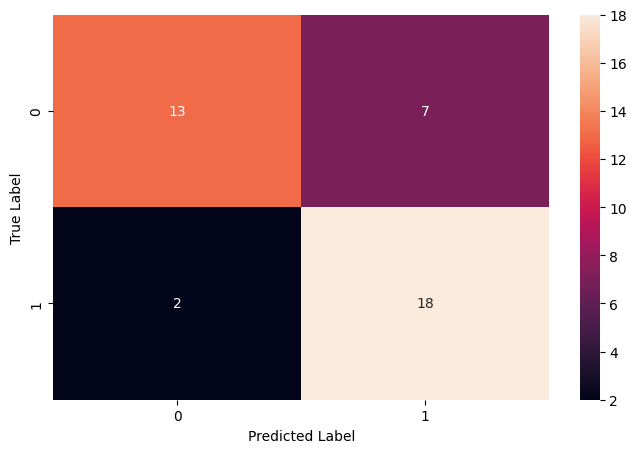

Accuracy: 77.5
Precision: 72.0
Recall: 90.0


In [38]:
    mnb = MultinomialNB()
    cv_results_mnb = cross_val_score(mnb, X_train, y_train, cv=kfold, scoring='accuracy')
    print("Multinomial Naive Bayes")
    print("Cross-validation results (Accuracy):", cv_results_mnb * 100)
    

    mnb.fit(X_train, y_train)
    predict = mnb.predict(X_test)

    # Confusion matrix model
    plt.figure(figsize=(8, 5))
    sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".0f")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Skor akurasi model
    accuracy_mnb = accuracy_score(y_test, predict)
    print('Accuracy:', accuracy_mnb * 100)
    cv_accuracy_mnb.append(accuracy_mnb)

    # Precision
    precision_mnb = precision_score(y_test, predict)
    print('Precision:', precision_mnb * 100)
    cv_precision_mnb.append(precision_mnb)

    # Recall
    recall_mnb = recall_score(y_test, predict)
    print('Recall:', recall_mnb * 100)
    cv_recall_mnb.append(recall_mnb)

BERNOULLI NAIVE BAYES

Bernoulli Naive Bayes
Cross-validation results (Accuracy): [77.77777778 77.77777778 66.66666667 72.22222222 77.77777778 75.
 80.55555556 72.22222222 69.44444444 77.77777778]


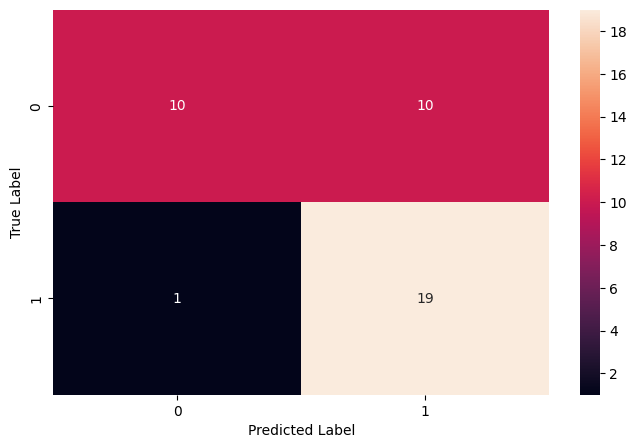

Accuracy: 72.5
Precision: 65.51724137931035
Recall: 95.0


In [39]:
    bnb = BernoulliNB()
    cv_results_bnb = cross_val_score(bnb, X_train, y_train, cv=kfold, scoring='accuracy')
    print("Bernoulli Naive Bayes")
    print("Cross-validation results (Accuracy):", cv_results_bnb * 100)
    

    bnb.fit(X_train, y_train)
    predict_bnb = bnb.predict(X_test)

    plt.figure(figsize=(8, 5))
    sns.heatmap(confusion_matrix(y_test, predict_bnb), annot=True, fmt=".0f")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    accuracy_bnb = accuracy_score(y_test, predict_bnb)
    print('Accuracy:', accuracy_bnb * 100)
    cv_accuracy_bnb.append(accuracy_bnb)

    precision_bnb = precision_score(y_test, predict_bnb)
    print('Precision:', precision_bnb * 100)
    cv_precision_bnb.append(precision_bnb)

    recall_bnb = recall_score(y_test, predict_bnb)
    print('Recall:', recall_bnb * 100)
    cv_recall_bnb.append(recall_bnb)

GAUSSIAN NAIVE BAYES

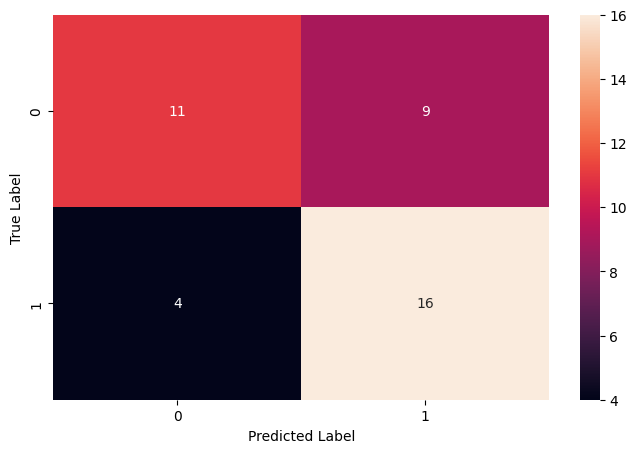

Accuracy: 67.5
Precision: 64.0
Recall: 80.0


In [40]:

    gnb = GaussianNB()
    gnb.fit(X_train.toarray(), y_train)
    predict_gnb = gnb.predict(X_test.toarray())

    plt.figure(figsize=(8, 5))
    sns.heatmap(confusion_matrix(y_test, predict_gnb), annot=True, fmt=".0f")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    accuracy_gnb = accuracy_score(y_test, predict_gnb)
    print('Accuracy:', accuracy_gnb * 100)
    cv_accuracy_gnb.append(accuracy_gnb)

    precision_gnb = precision_score(y_test, predict_gnb)
    print('Precision:', precision_gnb * 100)
    cv_precision_gnb.append(precision_gnb)

    recall_gnb = recall_score(y_test, predict_gnb)
    print('Recall:', recall_gnb * 100)
    cv_recall_gnb.append(recall_gnb)

HASIL

In [41]:
results_data = {
    'Model': ['Multinomial NB', 'Bernoulli NB', 'Gaussian NB'],
    'Mean Accuracy': [np.mean(cv_accuracy_mnb)*100, np.mean(cv_accuracy_bnb)*100, np.mean(cv_accuracy_gnb)*100],
    'Mean Precision': [np.mean(cv_precision_mnb)*100, np.mean(cv_precision_bnb)*100, np.mean(cv_precision_gnb)*100],
    'Mean Recall': [np.mean(cv_recall_mnb)*100, np.mean(cv_recall_bnb)*100, np.mean(cv_recall_gnb)*100]
}

results_df = pd.DataFrame(results_data)

# Menampilkan hasil dalam satu tabel
print(results_df)

            Model  Mean Accuracy  Mean Precision  Mean Recall
0  Multinomial NB           77.5       72.000000         90.0
1    Bernoulli NB           72.5       65.517241         95.0
2     Gaussian NB           67.5       64.000000         80.0


EVALUASI TRAIN

MULTINOMIAL

Multinomial Naive Bayes
Cross-validation results (Accuracy): [77.77777778 83.33333333 72.22222222 75.         80.55555556 75.
 80.55555556 72.22222222 72.22222222 69.44444444]


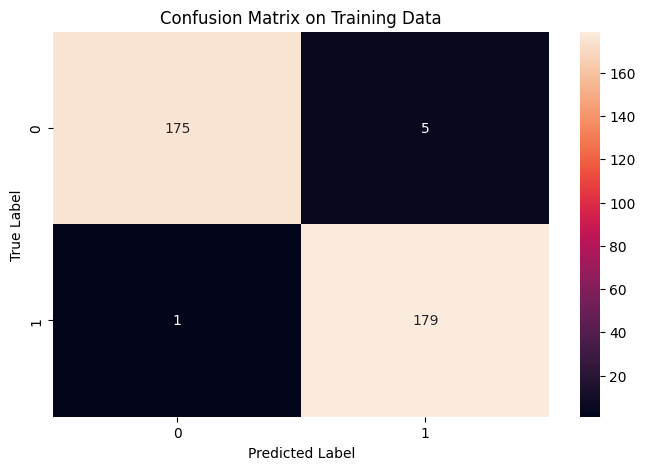

Training Accuracy: 98.33333333333333
Training Precision: 97.28260869565217
Training Recall: 99.44444444444444


In [42]:
mnb = MultinomialNB()

# Evaluasi dengan cross-validation pada data train
cv_results_mnb = cross_val_score(mnb, X_train, y_train, cv=kfold, scoring='accuracy')
print("Multinomial Naive Bayes")
print("Cross-validation results (Accuracy):", cv_results_mnb * 100)

# Melatih model dengan data train
mnb.fit(X_train, y_train)

# Prediksi pada data train
train_predict = mnb.predict(X_train)

# Confusion matrix untuk data train
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_train, train_predict), annot=True, fmt=".0f")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Training Data")
plt.show()

# Skor akurasi model pada data train
train_accuracy_mnb = accuracy_score(y_train, train_predict)
print('Training Accuracy:', train_accuracy_mnb * 100)

# Precision pada data train
train_precision_mnb = precision_score(y_train, train_predict)
print('Training Precision:', train_precision_mnb * 100)

# Recall pada data train
train_recall_mnb = recall_score(y_train, train_predict)
print('Training Recall:', train_recall_mnb * 100)

# Menyimpan hasil ke dalam list
cv_accuracy_mnb.append(train_accuracy_mnb)
cv_precision_mnb.append(train_precision_mnb)
cv_recall_mnb.append(train_recall_mnb)

BERNOULLI

Bernoulli Naive Bayes
Cross-validation results (Accuracy): [77.77777778 77.77777778 66.66666667 72.22222222 77.77777778 75.
 80.55555556 72.22222222 69.44444444 77.77777778]


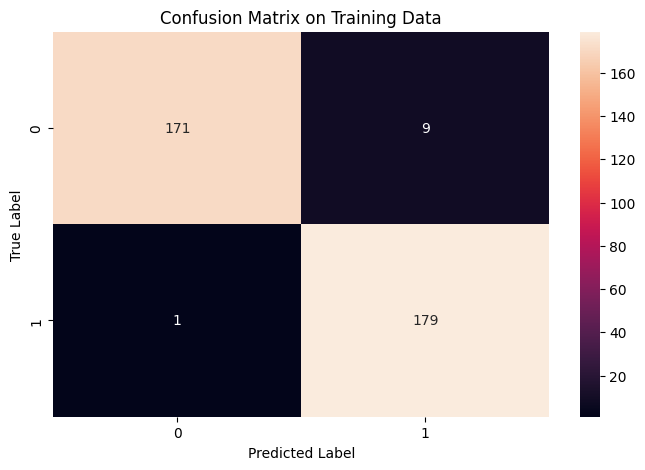

Training Accuracy: 97.22222222222221
Training Precision: 95.2127659574468
Training Recall: 99.44444444444444


In [43]:
bnb = BernoulliNB()

# Evaluasi dengan cross-validation pada data train
cv_results_bnb = cross_val_score(bnb, X_train, y_train, cv=kfold, scoring='accuracy')
print("Bernoulli Naive Bayes")
print("Cross-validation results (Accuracy):", cv_results_bnb * 100)

# Melatih model dengan data train
bnb.fit(X_train, y_train)

# Prediksi pada data train
train_predict_bnb = bnb.predict(X_train)

# Confusion matrix untuk data train
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_train, train_predict_bnb), annot=True, fmt=".0f")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Training Data")
plt.show()

# Skor akurasi model pada data train
train_accuracy_bnb = accuracy_score(y_train, train_predict_bnb)
print('Training Accuracy:', train_accuracy_bnb * 100)

# Precision pada data train
train_precision_bnb = precision_score(y_train, train_predict_bnb)
print('Training Precision:', train_precision_bnb * 100)

# Recall pada data train
train_recall_bnb = recall_score(y_train, train_predict_bnb)
print('Training Recall:', train_recall_bnb * 100)

# Menyimpan hasil ke dalam list
cv_accuracy_bnb.append(train_accuracy_bnb)
cv_precision_bnb.append(train_precision_bnb)
cv_recall_bnb.append(train_recall_bnb)

GAUSSIAN

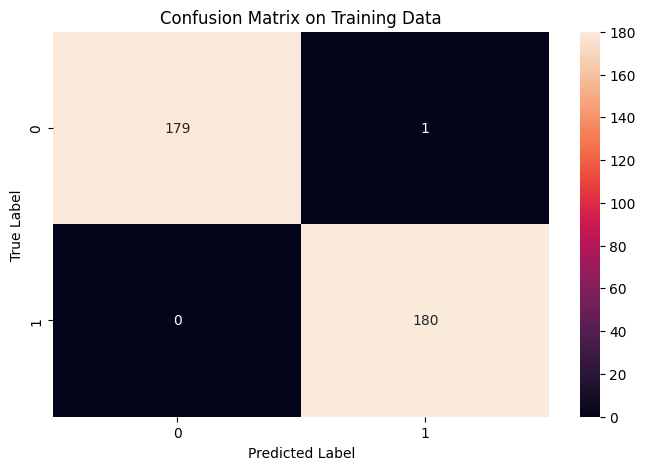

Training Accuracy: 99.72222222222223
Training Precision: 99.4475138121547
Training Recall: 100.0


In [44]:
gnb = GaussianNB()

# Melatih model dengan data train
gnb.fit(X_train.toarray(), y_train)

# Prediksi pada data train
train_predict_gnb = gnb.predict(X_train.toarray())

# Confusion matrix untuk data train
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_train, train_predict_gnb), annot=True, fmt=".0f")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on Training Data")
plt.show()

# Skor akurasi model pada data train
train_accuracy_gnb = accuracy_score(y_train, train_predict_gnb)
print('Training Accuracy:', train_accuracy_gnb * 100)

# Precision pada data train
train_precision_gnb = precision_score(y_train, train_predict_gnb)
print('Training Precision:', train_precision_gnb * 100)

# Recall pada data train
train_recall_gnb = recall_score(y_train, train_predict_gnb)
print('Training Recall:', train_recall_gnb * 100)

# Menyimpan hasil ke dalam list
cv_accuracy_gnb.append(train_accuracy_gnb)
cv_precision_gnb.append(train_precision_gnb)
cv_recall_gnb.append(train_recall_gnb)

In [45]:
results_data = {
    'Model': ['Multinomial NB', 'Bernoulli NB', 'Gaussian NB'],
    'Mean Accuracy': [np.mean(cv_accuracy_mnb) * 100, np.mean(cv_accuracy_bnb) * 100, np.mean(cv_accuracy_gnb) * 100],
    'Mean Precision': [np.mean(cv_precision_mnb) * 100, np.mean(cv_precision_bnb) * 100, np.mean(cv_precision_gnb) * 100],
    'Mean Recall': [np.mean(cv_recall_mnb) * 100, np.mean(cv_recall_bnb) * 100, np.mean(cv_recall_gnb) * 100]
}

# Membuat DataFrame dari data hasil
results_df = pd.DataFrame(results_data)

# Menampilkan hasil dalam satu tabel
print(results_df)

            Model  Mean Accuracy  Mean Precision  Mean Recall
0  Multinomial NB      87.916667       84.641304    94.722222
1    Bernoulli NB      84.861111       80.365004    97.222222
2     Gaussian NB      83.611111       81.723757    90.000000
